# ASSIGNMENT NO 2

PS2 : Predict the house price 
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression 
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Sejal Dahake\\Desktop\\LP III\\ML\\Datasets\\House_Rent_Dataset.csv")

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


## PRE PROCESSS

In [6]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

<AxesSubplot:>

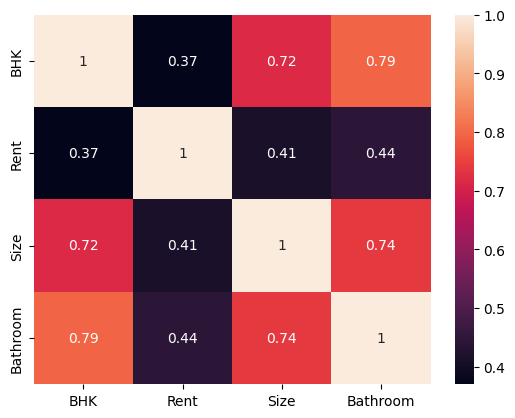

In [8]:
sns.heatmap(df.corr(), annot = True)

In [9]:
df.drop(["Posted On"], axis="columns", inplace=True)
df.drop(["Area Locality"], axis="columns", inplace=True)

In [10]:
df["Floor Number"]=df["Floor"].apply(lambda x:str(x).split()[0])

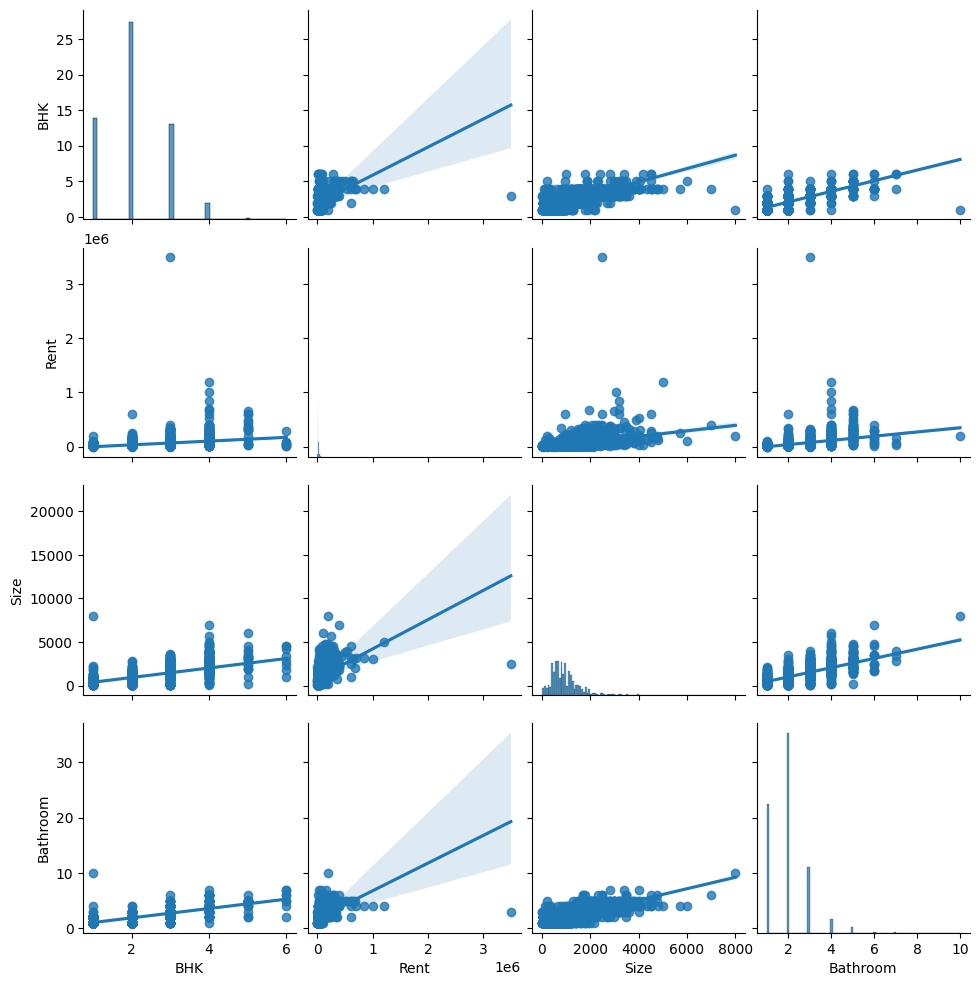

In [11]:
sns.pairplot(df, kind="reg")

In [12]:
df["Total Floor"]=df["Floor"].apply(lambda x:str(x).split()[-1])

In [13]:
del df['Floor']

In [14]:
df['Floor Number'].value_counts()

1         1161
2          945
Ground     927
3          512
4          272
5          164
6           93
7           74
10          67
8           66
9           65
12          47
11          43
15          41
14          34
18          26
Upper       23
17          22
16          21
19          16
13          15
20          12
25          12
Lower       11
23           9
24           6
21           6
30           5
34           4
28           4
35           3
65           3
22           3
26           3
32           3
60           3
27           3
40           2
53           2
45           2
36           2
48           2
29           1
49           1
50           1
39           1
46           1
41           1
44           1
33           1
37           1
47           1
43           1
76           1
Name: Floor Number, dtype: int64

In [15]:
df["Floor Number"] = df["Floor Number"].replace(['Ground'],0)
df["Floor Number"] = df["Floor Number"].replace(['Upper'],-1)

In [16]:
df["Floor Number"] = df["Floor Number"].replace(['Lower'],-2)

In [17]:
df["Floor Number"].value_counts()

1     1161
2      945
0      927
3      512
4      272
5      164
6       93
7       74
10      67
8       66
9       65
12      47
11      43
15      41
14      34
18      26
-1      23
17      22
16      21
19      16
13      15
20      12
25      12
-2      11
23       9
24       6
21       6
30       5
34       4
28       4
35       3
65       3
22       3
26       3
32       3
60       3
27       3
40       2
53       2
45       2
36       2
48       2
29       1
49       1
50       1
39       1
46       1
41       1
44       1
33       1
37       1
47       1
43       1
76       1
Name: Floor Number, dtype: int64

In [18]:
df["Total Floor"].value_counts()

4         938
3         915
2         868
5         422
1         335
         ... 
39          1
62          1
59          1
66          1
Ground      1
Name: Total Floor, Length: 67, dtype: int64

In [19]:
df["Total Floor"] = df["Total Floor"].replace(['Ground'],1)

In [20]:
df["Total Floor"].value_counts()

4     938
3     915
2     868
5     422
1     335
     ... 
39      1
62      1
59      1
66      1
1       1
Name: Total Floor, Length: 67, dtype: int64

In [21]:
df["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [22]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Area Type'] = label_encoder.fit_transform(df['Area Type'])
df['Area Type'].unique()

array([2, 1, 0])

In [24]:
label_encoder = preprocessing.LabelEncoder()
df["Furnishing Status"]= label_encoder.fit_transform(df["Furnishing Status"])  
df["Furnishing Status"].unique()

array([2, 1, 0])

In [25]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df["Tenant Preferred"]= label_encoder.fit_transform(df["Tenant Preferred"])
  
df["Tenant Preferred"].unique()

array([1, 0, 2])

In [26]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df["Point of Contact"]= label_encoder.fit_transform(df["Point of Contact"])
  
df["Point of Contact"].unique()

array([2, 0, 1])

In [27]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df['City']= label_encoder.fit_transform(df['City'])
  
df['City'].unique()

array([4, 5, 0, 2, 1, 3])

In [28]:
df.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Area Type             int32
City                  int32
Furnishing Status     int32
Tenant Preferred      int32
Bathroom              int64
Point of Contact      int32
Floor Number         object
Total Floor          object
dtype: object

In [29]:
from sklearn.preprocessing import minmax_scale

df["Rent"] = minmax_scale(df["Rent"])
df["Size"] = minmax_scale(df["Size"])

In [30]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
0,2,0.002515,0.136421,2,4,2,1,2,2,0,2
1,2,0.005373,0.098874,2,4,1,1,1,2,1,3
2,2,0.004516,0.123905,2,4,1,1,1,2,1,3
3,2,0.002515,0.098874,2,4,2,1,1,2,1,2
4,2,0.001801,0.105131,1,4,2,0,1,2,1,2


In [31]:
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df < (q1 - 1.5 * IQR))|(df > (q3 + 1.5 * IQR)))]
    return outliers

In [32]:
outliers = find_outliers(df['Size'])
print("No of outliers : " + str(len(outliers)))
print("Max outlier : " + str(outliers.max()))
print("Min outlier : " + str(outliers.min()))
outliers

No of outliers : 203
Max outlier : 1.0
Min outlier : 0.2740926157697121


181     0.274093
275     0.499374
381     0.436796
516     0.275344
543     0.287610
          ...   
4696    0.524406
4698    0.286608
4712    0.299750
4713    0.311640
4716    0.405507
Name: Size, Length: 203, dtype: float64

In [33]:
x = df.drop("Rent", axis = 1)
x

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
0,2,0.136421,2,4,2,1,2,2,0,2
1,2,0.098874,2,4,1,1,1,2,1,3
2,2,0.123905,2,4,1,1,1,2,1,3
3,2,0.098874,2,4,2,1,1,2,1,2
4,2,0.105131,1,4,2,0,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
4741,2,0.123905,1,3,1,1,2,2,3,5
4742,3,0.249061,2,3,1,1,3,2,1,4
4743,3,0.217772,1,3,1,1,3,0,3,5
4744,3,0.186483,1,3,1,2,2,0,23,34


In [34]:
y = df['Rent']


In [35]:
y

0       0.002515
1       0.005373
2       0.004516
3       0.002515
4       0.001801
          ...   
4741    0.003944
4742    0.007946
4743    0.009660
4744    0.012519
4745    0.003944
Name: Rent, Length: 4746, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 101, test_size = 0.2)

In [37]:
x.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
0,2,0.136421,2,4,2,1,2,2,0,2
1,2,0.098874,2,4,1,1,1,2,1,3
2,2,0.123905,2,4,1,1,1,2,1,3
3,2,0.098874,2,4,2,1,1,2,1,2
4,2,0.105131,1,4,2,0,1,2,1,2


In [39]:
#Linear
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
pred = lr.predict(x_test)

In [41]:
actual = y_test

In [42]:
base = pd.DataFrame()
base['actual'] = actual
base['predictions'] = pred

In [43]:
base

,actual,predictions
4501,0.010232,0.016377
480,0.002515,0.007322
558,0.019092,0.009266
1381,0.008803,0.015736
4744,0.012519,0.028539
...,...,...
4024,0.003373,0.009961
502,0.003658,0.014960
246,0.001658,0.005088
3865,0.005373,0.003422


In [44]:
#r2 score

from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.4467973670846298

In [45]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred))

0.014074425725054495